#Image_recognition_with_Torch_and_Lavis

In [1]:
!pip install salesforce-lavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 108.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 K

In [1]:
import torch
from PIL import Image



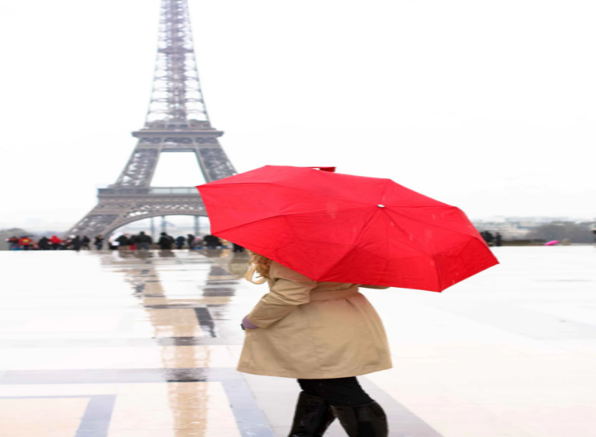

In [3]:
raw_image = Image.open("/content/paris.png").convert("RGB")
caption = "a woman on with umbrella in paris" 

display(raw_image.resize((596, 437)))


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from lavis.models import load_model_and_preprocess
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

## **Architectures**: albef_feature_extractor **Types**: base

In [6]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="albef_feature_extractor", model_type="base", is_eval=True, device=device)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
text_input = txt_processors["eval"](caption)
sample = {"image": image, "text_input": [text_input]}

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth" to /root/.cache/torch/hub/checkpoints/deit_base_patch16_224-b5f2ef4d.pth
100%|██████████| 330M/330M [00:02<00:00, 132MB/s]


100%|██████████| 3.25G/3.25G [02:52<00:00, 20.3MB/s]


reshape position embedding from 256 to 196


In [7]:
model

AlbefFeatureExtractor(
  (visual_encoder): VisionTransformerEncoder(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace

In [8]:
vis_processors["eval"]

In [9]:
image.shape

torch.Size([1, 3, 224, 224])

In [10]:
text_input

'a woman on with umbrella in paris'

In [11]:
sample

{'image': tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           ...,
           [1.8427, 1.8427, 1.8573,  ..., 1.8719, 1.8719, 1.8719],
           [1.8135, 1.7990, 1.8135,  ..., 1.8573, 1.8573, 1.8573],
           [1.8135, 1.8135, 1.8135,  ..., 1.8281, 1.8427, 1.8427]],
 
          [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           ...,
           [1.6997, 1.6997, 1.7147,  ..., 1.8498, 1.8498, 1.8498],
           [1.6697, 1.6547, 1.6697,  ..., 1.8348, 1.8348, 1.8348],
           [1.6697, 1.6697, 1.6697,  ..., 1.8047, 1.8198, 1.8198]],
 
          [[2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
           [2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
           [2.1

In [12]:
features_multimodal = model.extract_features(sample)
print(features_multimodal.multimodal_embeds.shape)
# # torch.Size([1, 12, 768]), use features_multimodal[:,0,:] for multimodal classification tasks

torch.Size([1, 9, 768])


In [13]:
features_image = model.extract_features(sample, mode="image")
features_text = model.extract_features(sample, mode="text")
print(features_image.image_embeds.shape)
# torch.Size([1, 197, 768])
print(features_text.text_embeds.shape)
# torch.Size([1, 12, 768])

torch.Size([1, 197, 768])
torch.Size([1, 9, 768])


In [14]:
# low-dimensional projected features
print(features_image.image_embeds_proj.shape)
# torch.Size([1, 197, 256])
print(features_text.text_embeds_proj.shape)
# torch.Size([1, 12, 256])
similarity = features_image.image_embeds_proj[:,0,:] @ features_text.text_embeds_proj[:,0,:].t()
print(similarity)
# tensor([[0.1136]])

torch.Size([1, 197, 256])
torch.Size([1, 9, 256])
tensor([[0.1087]], device='cuda:0')


## **Architectures**: blip_vqa **Types**: vqav2

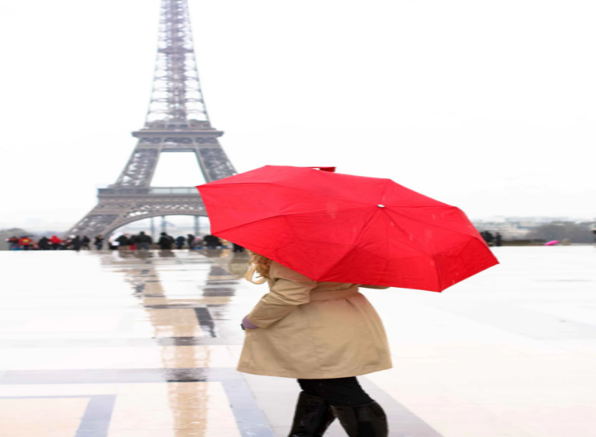

In [15]:
display(raw_image.resize((596, 437)))


In [16]:
model, vis_processors, txt_processors = load_model_and_preprocess(name="blip_vqa", model_type="vqav2", is_eval=True, device=device)

100%|██████████| 1.35G/1.35G [01:22<00:00, 17.5MB/s]


In [17]:
model

BlipVQA(
  (visual_encoder): VisionTransformerEncoder(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
    

In [18]:
vis_processors.keys()

dict_keys(['train', 'eval'])

In [19]:
txt_processors.keys()

dict_keys(['train', 'eval'])

In [20]:
question = "Which city is this photo taken?"

In [21]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
question = txt_processors["eval"](question)

samples = {"image": image, "text_input": question}

In [22]:
image.shape

torch.Size([1, 3, 480, 480])

In [23]:
print(samples)

{'image': tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
          ...,
          [1.8135, 1.7990, 1.7990,  ..., 1.8427, 1.8427, 1.8427],
          [1.8281, 1.8135, 1.8135,  ..., 1.8427, 1.8427, 1.8427],
          [1.8135, 1.8135, 1.8135,  ..., 1.8427, 1.8427, 1.8427]],

         [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
          ...,
          [1.6697, 1.6547, 1.6547,  ..., 1.8198, 1.8198, 1.8198],
          [1.6847, 1.6697, 1.6697,  ..., 1.8198, 1.8198, 1.8198],
          [1.6697, 1.6697, 1.6697,  ..., 1.8198, 1.8198, 1.8198]],

         [[2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
          [2.1459, 2.1459, 2.145

In [24]:
answer_candidates = ["Singapore", "London", "Palo Alto", "Tokyo", "Paris"]

model.predict_answers(samples, answer_list=answer_candidates, inference_method="rank")

['Paris']

In [25]:
batch_size = 5

# create a batch of samples, could be multiple images or copies of the same image
image_batch = image.repeat(batch_size, 1, 1, 1)

# create a batch of questions, make sure the number of questions matches the number of images
question_1 = txt_processors["eval"]("Which city is this photo taken?")
question_2 = txt_processors["eval"]("What time is this during the day?")
question_3 = txt_processors["eval"]("Is there an airplane?")
question_4 = txt_processors["eval"]("How many people is in the picture?")
question_5 = txt_processors["eval"]("What color is the Umbrella")


question_batch = [question_1, question_2, question_3, question_4, question_5]

model.predict_answers(samples={"image": image_batch, "text_input": question_batch}, inference_method="generate")

['paris', 'afternoon', 'no', '1', 'red']

## **Architectures**: albef_feature_extractor **Types**: base

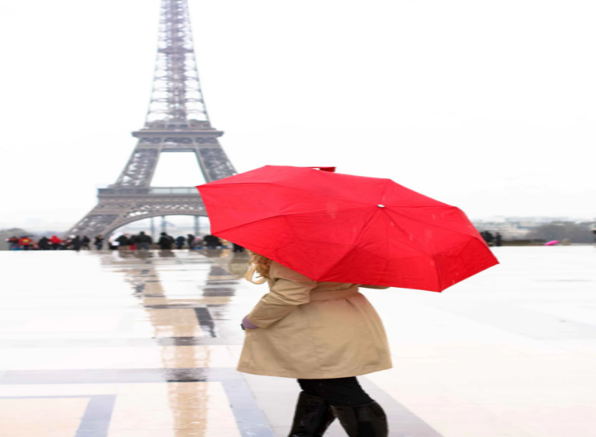

In [26]:
display(raw_image.resize((596, 437)))

In [27]:
model, vis_processors, txt_processors = load_model_and_preprocess("albef_feature_extractor", model_type="base", is_eval=True, device=device)

reshape position embedding from 256 to 196


In [28]:
cls_names = ["Umbrella", "sky", "person", "water", "Effiel Tower","car","airplane"]
cls_names = [txt_processors["eval"](cls_nm) for cls_nm in cls_names]
cls_names

['umbrella', 'sky', 'person', 'water', 'effiel tower', 'car', 'airplane']

In [29]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [30]:
sample = {"image": image, "text_input": cls_names}

image_features = model.extract_features(sample, mode="image").image_embeds_proj[:, 0]
text_features = model.extract_features(sample, mode="text").text_embeds_proj[:, 0]

In [31]:
sims = (image_features @ text_features.t())[0] / model.temp
probs = torch.nn.Softmax(dim=0)(sims).tolist()

for cls_nm, prob in zip(cls_names, probs):
    print(f"{cls_nm}: \t {prob:.3%}")

umbrella: 	 34.783%
sky: 	 0.805%
person: 	 0.566%
water: 	 0.469%
effiel tower: 	 61.532%
car: 	 0.652%
airplane: 	 1.193%


## **Architectures**: blip2_image_text_matching **Types**: pretrain

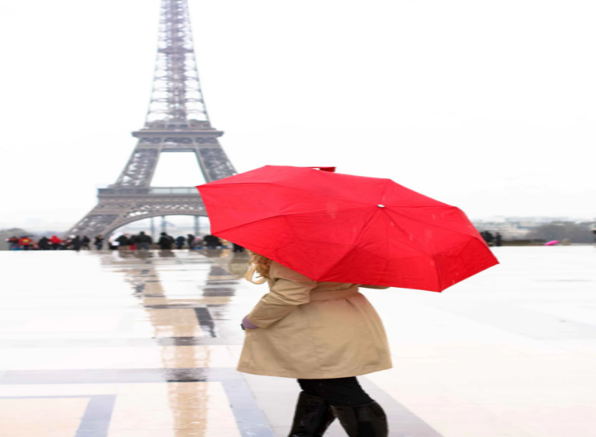

In [32]:
display(raw_image.resize((596, 437)))

In [33]:
caption = "effiel tower in paris"


In [34]:
model, vis_processors, text_processors = load_model_and_preprocess("blip2_image_text_matching", "pretrain", device=device, is_eval=True)
#model, vis_processors, text_processors = load_model_and_preprocess("blip2_image_text_matching", "coco", device=device, is_eval=True)

100%|██████████| 1.89G/1.89G [01:32<00:00, 22.0MB/s]
100%|██████████| 712M/712M [00:32<00:00, 23.0MB/s]


In [35]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

In [36]:
itm_output = model({"image": img, "text_input": txt}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

The image and text are matched with a probability of 13.505%


## **Architectures**: blip_caption **Types**: large_coco

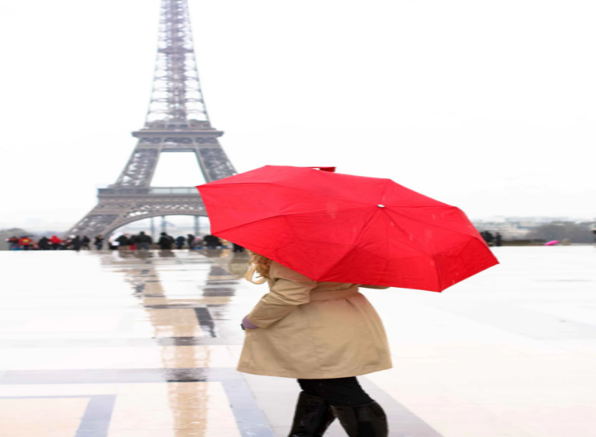

In [37]:
display(raw_image.resize((596, 437)))

In [38]:
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)

100%|██████████| 1.66G/1.66G [01:25<00:00, 20.8MB/s]


In [39]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image})

['a woman with a red umbrella in front of the eiffel tower']

In [40]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a woman in coat holding an umbrella walking on cement',
 'a woman holding an umbrella walks next to the eiffel tower',
 'the woman in the trenchcoat is holding an umbrella']